# Problem Set 10

## Example: predicting colon cancer from stool microbiome composition

In [1]:
# plot settings
options(repr.plot.width=15, repr.plot.height=10)

In [2]:
# Install a package BioConductor ExperimentHub to access the example data
install.packages("glmnet")
BiocManager::install()
BiocManager::install("ExperimentHub")

# Install glmnet for LASSO and Elastic Net regression
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/yd/s2tbldys49q1qq6bv1skfs340000gn/T//Rtmp0M7gRO/downloaded_packages


Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Old packages: 'backports', 'BH', 'BiocManager', 'bit', 'bit64', 'boot',
  'callr', 'class', 'cli', 'clipr', 'cluster', 'codetools', 'colorspace',
  'crayon', 'curl', 'DBI', 'dbplyr', 'desc', 'digest', 'dplyr', 'ellipsis',
  'fansi', 'farver', 'fastmap', 'foreach', 'glue', 'highr', 'hms', 'htmltools',
  'httpuv', 'httr', 'IRdisplay', 'IRkernel', 'isoband', 'iterators',
  'jsonlite', 'KernSmooth', 'knitr', 'labeling', 'later', 'lattice',
  'lifecycle', 'magrittr', 'MASS', 'Matrix', 'memoise', 'mgcv', 'mime', 'nlme',
  'nnet', 'openssl', 'pbdZMQ', 'pillar', 'pkgbuild', 'pkgload', 'prettydoc',
  'processx', 'promises', 'ps', 'purrr', 'R6', 'rappdirs', 'Rcpp', 'repr',
  'rlang', 'rmarkdown', 'rprojroot', 'RSQLite', 'rstudioapi', 'rzmq',
  'S4Vectors', 'scales', 'shape', 'shiny', 'spatial', 'stringi', 'survival',
  'sys', 'testthat', 'tibble', 'tidyr', 'tidyselect', 'tinytex', 'utf8',
  'uuid', 'vctrs', 'viridisLite', 'wi


The downloaded binary packages are in
	/var/folders/yd/s2tbldys49q1qq6bv1skfs340000gn/T//Rtmp0M7gRO/downloaded_packages


Old packages: 'backports', 'BH', 'BiocManager', 'bit', 'bit64', 'boot',
  'callr', 'class', 'cli', 'clipr', 'cluster', 'codetools', 'colorspace',
  'crayon', 'curl', 'DBI', 'dbplyr', 'desc', 'digest', 'dplyr', 'ellipsis',
  'fansi', 'farver', 'fastmap', 'foreach', 'glue', 'highr', 'hms', 'htmltools',
  'httpuv', 'httr', 'IRdisplay', 'IRkernel', 'isoband', 'iterators',
  'jsonlite', 'KernSmooth', 'knitr', 'labeling', 'later', 'lattice',
  'lifecycle', 'magrittr', 'MASS', 'Matrix', 'memoise', 'mgcv', 'mime', 'nlme',
  'nnet', 'openssl', 'pbdZMQ', 'pillar', 'pkgbuild', 'pkgload', 'prettydoc',
  'processx', 'promises', 'ps', 'purrr', 'R6', 'rappdirs', 'Rcpp', 'repr',
  'rlang', 'rmarkdown', 'rprojroot', 'RSQLite', 'rstudioapi', 'rzmq',
  'S4Vectors', 'scales', 'shape', 'shiny', 'spatial', 'stringi', 'survival',
  'sys', 'testthat', 'tibble', 'tidyr', 'tidyselect', 'tinytex', 'utf8',
  'uuid', 'vctrs', 'viridisLite', 'withr', 'xfun'




The downloaded binary packages are in
	/var/folders/yd/s2tbldys49q1qq6bv1skfs340000gn/T//Rtmp0M7gRO/downloaded_packages


In [3]:

library("BiocManager")
library("glmnet")


Bioconductor version 3.10 (BiocManager 1.30.10), ?BiocManager::install for help

Bioconductor version '3.10' is out-of-date; the current release version '3.13'
  is available with R version '4.1'; see https://bioconductor.org/install

Warning message:
“package ‘glmnet’ was built under R version 3.6.2”
Loading required package: Matrix

Loaded glmnet 4.1-1



In [4]:
library("ExperimentHub")

eh = ExperimentHub()
data = eh[["EH361"]]


Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: AnnotationHub



## 1. Explore the data set

Explore our data set. The rows are the presence of microbes in the gut. They also contain the presence of cancer. The columns represent different patients. 

__i) How many patients are in the data set?__

__ii) How many species of microbe are in the data set?__

There are possible 3 disease states. Create a data set with only patients who are either "N" (No cancer) or "cancer" (cancer). In other words, remove the patiends with adenomas.

__iii) After removing the patients with adenomas, how many patients are in the data set?__

In [5]:
data

ExpressionSet (storageMode: lockedEnvironment)
assayData: 1505 features, 156 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: CCIS00146684ST-4-0 CCIS00281083ST-3-0 ...
    CCIS98832363ST-4-0 (156 total)
  varLabels: subjectID age ... number_reads (15 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 25432777 
Annotation:  

In [6]:
rownames(data)

[1] "k__Bacteria"                                                                                                                                                                                                                                                           
   [2] "k__Viruses"                                                                                                                                                                                                                                                            
   [3] "k__Bacteria|p__Firmicutes"                                                                                                                                                                                                                                             
   [4] "k__Bacteria|p__Bacteroidetes"                                                                                                                                                                                                                                          
   [5] "k__Bacteria|p__Actinobacteria"                                                                                                                                                                                                                                         
   [6] "k__Bacteria|p__Verrucomicrobia"                                                                                                                                                                                                                                        
   [7] "k__Bacteria|p__Proteobacteria"                                                                                                                                                                                                                                         
   [8] "k__Viruses|p__Viruses_noname"                                                                                                                                                                                                                                          
   [9] "k__Bacteria|p__Candidatus_Saccharibacteria"                                                                                                                                                                                                                            
  [10] "k__Bacteria|p__Firmicutes|c__Clostridia"                                                                                                                                                                                                                               
  [11] "k__Bacteria|p__Bacteroidetes|c__Bacteroidia"                                                                                                                                                                                                                           
  [12] "k__Bacteria|p__Actinobacteria|c__Actinobacteria"                                                                                                                                                                                                                       
  [13] "k__Bacteria|p__Firmicutes|c__Negativicutes"                                                                                                                                                                                                                            
  [14] "k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae"                                                                                                                                                                                                                    
  [15] "k__Bacteria|p__Proteobacteria|c__Deltaproteobacteria"                                                                                                                                      

In [7]:
colnames(data)

[1] "CCIS00146684ST-4-0"  "CCIS00281083ST-3-0"  "CCIS02124300ST-4-0" 
  [4] "CCIS02379307ST-4-0"  "CCIS02856720ST-4-0"  "CCIS03473770ST-4-0" 
  [7] "CCIS03857607ST-4-0"  "CCIS05314658ST-4-0"  "CCIS06260551ST-3-0" 
 [10] "CCIS07277498ST-4-0"  "CCIS07539127ST-4-0"  "CCIS07648107ST-4-0" 
 [13] "CCIS08668806ST-3-0"  "CCIS09568613ST-4-0"  "CCIS10706551ST-3-0" 
 [16] "CCIS10793554ST-4-0"  "CCIS11015875ST-4-0"  "CCIS11019776ST-4-0" 
 [19] "CCIS11354283ST-4-0"  "CCIS11362406ST-4-0"  "CCIS11558985ST-4-0" 
 [22] "CCIS12370844ST-4-0"  "CCIS12656533ST-4-0"  "CCIS13047523ST-4-0" 
 [25] "CCIS14449628ST-4-0"  "CCIS15704761ST-4-0"  "CCIS15794887ST-4-0" 
 [28] "CCIS16326685ST-4-0"  "CCIS16383318ST-4-0"  "CCIS16561622ST-4-0" 
 [31] "CCIS17669415ST-4-0"  "CCIS19142497ST-3-0"  "CCIS20795251ST-4-0" 
 [34] "CCIS21126322ST-4-0"  "CCIS21278152ST-4-0"  "CCIS22275061ST-4-0" 
 [37] "CCIS22416007ST-4-0"  "CCIS22906510ST-20-0" "CCIS22958137ST-20-0"
 [40] "CCIS23164343ST-4-0"  "CCIS24254057ST-4-0"  "CCIS24898163ST-4-0" 
 [43] "CCIS25399172ST-4-0"  "CCIS27304052ST-3-0"  "CCIS27927933ST-4-0" 
 [46] "CCIS28384594ST-4-0"  "CCIS29210128ST-4-0"  "CCIS29688262ST-20-0"
 [49] "CCIS31434951ST-20-0" "CCIS32105356ST-4-0"  "CCIS32452666ST-4-0" 
 [52] "CCIS33816588ST-4-0"  "CCIS34055159ST-4-0"  "CCIS34604008ST-4-0" 
 [55] "CCIS35092938ST-4-0"  "CCIS35100175ST-4-0"  "CCIS36699628ST-4-0" 
 [58] "CCIS36797902ST-4-0"  "CCIS37250421ST-4-0"  "CCIS38765456ST-20-0"
 [61] "CCIS40244499ST-3-0"  "CCIS41222843ST-4-0"  "CCIS41288781ST-4-0" 
 [64] "CCIS41548810ST-4-0"  "CCIS41692898ST-4-0"  "CCIS41806458ST-4-0" 
 [67] "CCIS44093303ST-4-0"  "CCIS44676181ST-4-0"  "CCIS44743950ST-4-0" 
 [70] "CCIS44757994ST-4-0"  "CCIS45571137ST-3-0"  "CCIS45793747ST-4-0" 
 [73] "CCIS46047672ST-4-0"  "CCIS46467422ST-4-0"  "CCIS47284573ST-4-0" 
 [76] "CCIS47745468ST-4-0"  "CCIS48174381ST-4-0"  "CCIS48507077ST-4-0" 
 [79] "CCIS48579360ST-4-0"  "CCIS48725289ST-4-0"  "CCIS50003399ST-4-0" 
 [82] "CCIS50148151ST-4-0"  "CCIS50369211ST-20-0" "CCIS50471204ST-4-0" 
 [85] "CCIS50561855ST-4-0"  "CCIS51595129ST-4-0"  "CCIS51667829ST-4-0" 
 [88] "CCIS52234160ST-4-0"  "CCIS52370277ST-4-0"  "CCIS53043478ST-4-0" 
 [91] "CCIS53355328ST-4-0"  "CCIS53557295ST-4-0"  "CCIS54027808ST-4-0" 
 [94] "CCIS55230578ST-4-0"  "CCIS55531770ST-4-0"  "CCIS56503244ST-3-0" 
 [97] "CCIS58234805ST-4-0"  "CCIS59132091ST-4-0"  "CCIS59903910ST-4-0" 
[100] "CCIS61287323ST-4-0"  "CCIS62605362ST-3-0"  "CCIS62794166ST-4-0" 
[103] "CCIS63448910ST-4-0"  "CCIS63468405ST-4-0"  "CCIS63910149ST-4-0" 
[106] "CCIS64773582ST-4-0"  "CCIS64785924ST-20-0" "CCIS65479369ST-4-0" 
[109] "CCIS70398272ST-4-0"  "CCIS71301801ST-4-0"  "CCIS71578391ST-4-0" 
[112] "CCIS72607085ST-4-0"  "CCIS74239020ST-4-0"  "CCIS74726977ST-3-0" 
[115] "CCIS76563044ST-4-0"  "CCIS76845094ST-20-0" "CCIS77100899ST-4-0" 
[118] "CCIS77252613ST-4-0"  "CCIS78100604ST-4-0"  "CCIS78318719ST-4-0" 
[121] "CCIS79210440ST-3-0"  "CCIS80834637ST-4-0"  "CCIS81139242ST-4-0" 
[124] "CCIS81710917ST-20-0" "CCIS81735969ST-20-0" "CCIS81887263ST-4-0" 
[127] "CCIS82146115ST-4-0"  "CCIS82507866ST-3-0"  "CCIS82944710ST-20-0"
[130] "CCIS83445808ST-4-0"  "CCIS83574003ST-4-0"  "CCIS83870198ST-4-0" 
[133] "CCIS84543192ST-4-0"  "CCIS85214191ST-3-0"  "CCIS87116798ST-4-0" 
[136] "CCIS87167916ST-4-0"  "CCIS87252800ST-4-0"  "CCIS87290971ST-4-0" 
[139] "CCIS87605453ST-4-0"  "CCIS88007743ST-4-0"  "CCIS88317640ST-4-0" 
[142] "CCIS90164298ST-4-0"  "CCIS90166425ST-4-0"  "CCIS90443472ST-4-0" 
[145] "CCIS90903952ST-3-0"  "CCIS91228662ST-4-0"  "CCIS93040568ST-20-0"
[148] "CCIS94417875ST-3-0"  "CCIS94496512ST-4-0"  "CCIS94603952ST-4-0" 
[151] "CCIS95097901ST-4-0"  "CCIS95409808ST-4-0"  "CCIS96387239ST-4-0" 
[154] "CCIS98482370ST-3-0"  "CCIS98512455ST-4-0"  "CCIS98832363ST-4-0"

For simplicity, let's only use the "n" and "cancer" states (and remove the adenomas).


In [8]:
data$disease

dataCancerNoCancer = data[, data$disease %in% c("n", "cancer")]

dataCancerNoCancer$disease

[1] "n"             "n"             "n"             "cancer"       
  [5] "n"             "n"             "n"             "n"            
  [9] "cancer"        "n"             "n"             "n"            
 [13] "small_adenoma" "n"             "n"             "small_adenoma"
 [17] "cancer"        "large_adenoma" "n"             "n"            
 [21] "n"             "cancer"        "cancer"        "n"            
 [25] "cancer"        "cancer"        "n"             "n"            
 [29] "n"             "n"             "cancer"        "large_adenoma"
 [33] "n"             "n"             "cancer"        "large_adenoma"
 [37] "cancer"        "small_adenoma" "cancer"        "n"            
 [41] "cancer"        "small_adenoma" "small_adenoma" "n"            
 [45] "n"             "large_adenoma" "n"             "n"            
 [49] "small_adenoma" "small_adenoma" "n"             "cancer"       
 [53] "cancer"        "n"             "small_adenoma" "cancer"       
 [57] "n"             "n"             "small_adenoma" "cancer"       
 [61] "cancer"        "cancer"        "cancer"        "cancer"       
 [65] "n"             "small_adenoma" "n"             "small_adenoma"
 [69] "small_adenoma" "cancer"        "n"             "n"            
 [73] "cancer"        "cancer"        "cancer"        "large_adenoma"
 [77] "n"             "small_adenoma" "small_adenoma" "cancer"       
 [81] "n"             "cancer"        "small_adenoma" "n"            
 [85] "large_adenoma" "n"             "small_adenoma" "large_adenoma"
 [89] "cancer"        "cancer"        "cancer"        "small_adenoma"
 [93] "small_adenoma" "cancer"        "small_adenoma" "large_adenoma"
 [97] "cancer"        "cancer"        "small_adenoma" "cancer"       
[101] "cancer"        "cancer"        "n"             "n"            
[105] "n"             "n"             "n"             "cancer"       
[109] "small_adenoma" "cancer"        "n"             "cancer"       
[113] "n"             "small_adenoma" "small_adenoma" "cancer"       
[117] "large_adenoma" "cancer"        "n"             "cancer"       
[121] "n"             "n"             "n"             "small_adenoma"
[125] "large_adenoma" "cancer"        "cancer"        "n"            
[129] "n"             "small_adenoma" "large_adenoma" "cancer"       
[133] "cancer"        "cancer"        "cancer"        "cancer"       
[137] "cancer"        "large_adenoma" "cancer"        "n"            
[141] "n"             "n"             "large_adenoma" "large_adenoma"
[145] "large_adenoma" "cancer"        "n"             "n"            
[149] "small_adenoma" "n"             "n"             "n"            
[153] "small_adenoma" "n"             "cancer"        "cancer"

[1] "n"      "n"      "n"      "cancer" "n"      "n"      "n"      "n"     
  [9] "cancer" "n"      "n"      "n"      "n"      "n"      "cancer" "n"     
 [17] "n"      "n"      "cancer" "cancer" "n"      "cancer" "cancer" "n"     
 [25] "n"      "n"      "n"      "cancer" "n"      "n"      "cancer" "cancer"
 [33] "cancer" "n"      "cancer" "n"      "n"      "n"      "n"      "n"     
 [41] "cancer" "cancer" "n"      "cancer" "n"      "n"      "cancer" "cancer"
 [49] "cancer" "cancer" "cancer" "n"      "n"      "cancer" "n"      "n"     
 [57] "cancer" "cancer" "cancer" "n"      "cancer" "n"      "cancer" "n"     
 [65] "n"      "cancer" "cancer" "cancer" "cancer" "cancer" "cancer" "cancer"
 [73] "cancer" "cancer" "n"      "n"      "n"      "n"      "n"      "cancer"
 [81] "cancer" "n"      "cancer" "n"      "cancer" "cancer" "n"      "cancer"
 [89] "n"      "n"      "n"      "cancer" "cancer" "n"      "n"      "cancer"
 [97] "cancer" "cancer" "cancer" "cancer" "cancer" "cancer" "n"      "n"     
[105] "n"      "cancer" "n"      "n"      "n"      "n"      "n"      "n"     
[113] "cancer" "cancer"

## 2. Lasso regression
Let's perform lasso regression. In this case, the response variable is categorical (cancer or no cancer) so we can use a binomial model, which is a subset of logistic models. 

__i) According to the crossvalidation analysis, how many species of microbe should we include in a predictive model of colon cancer?__

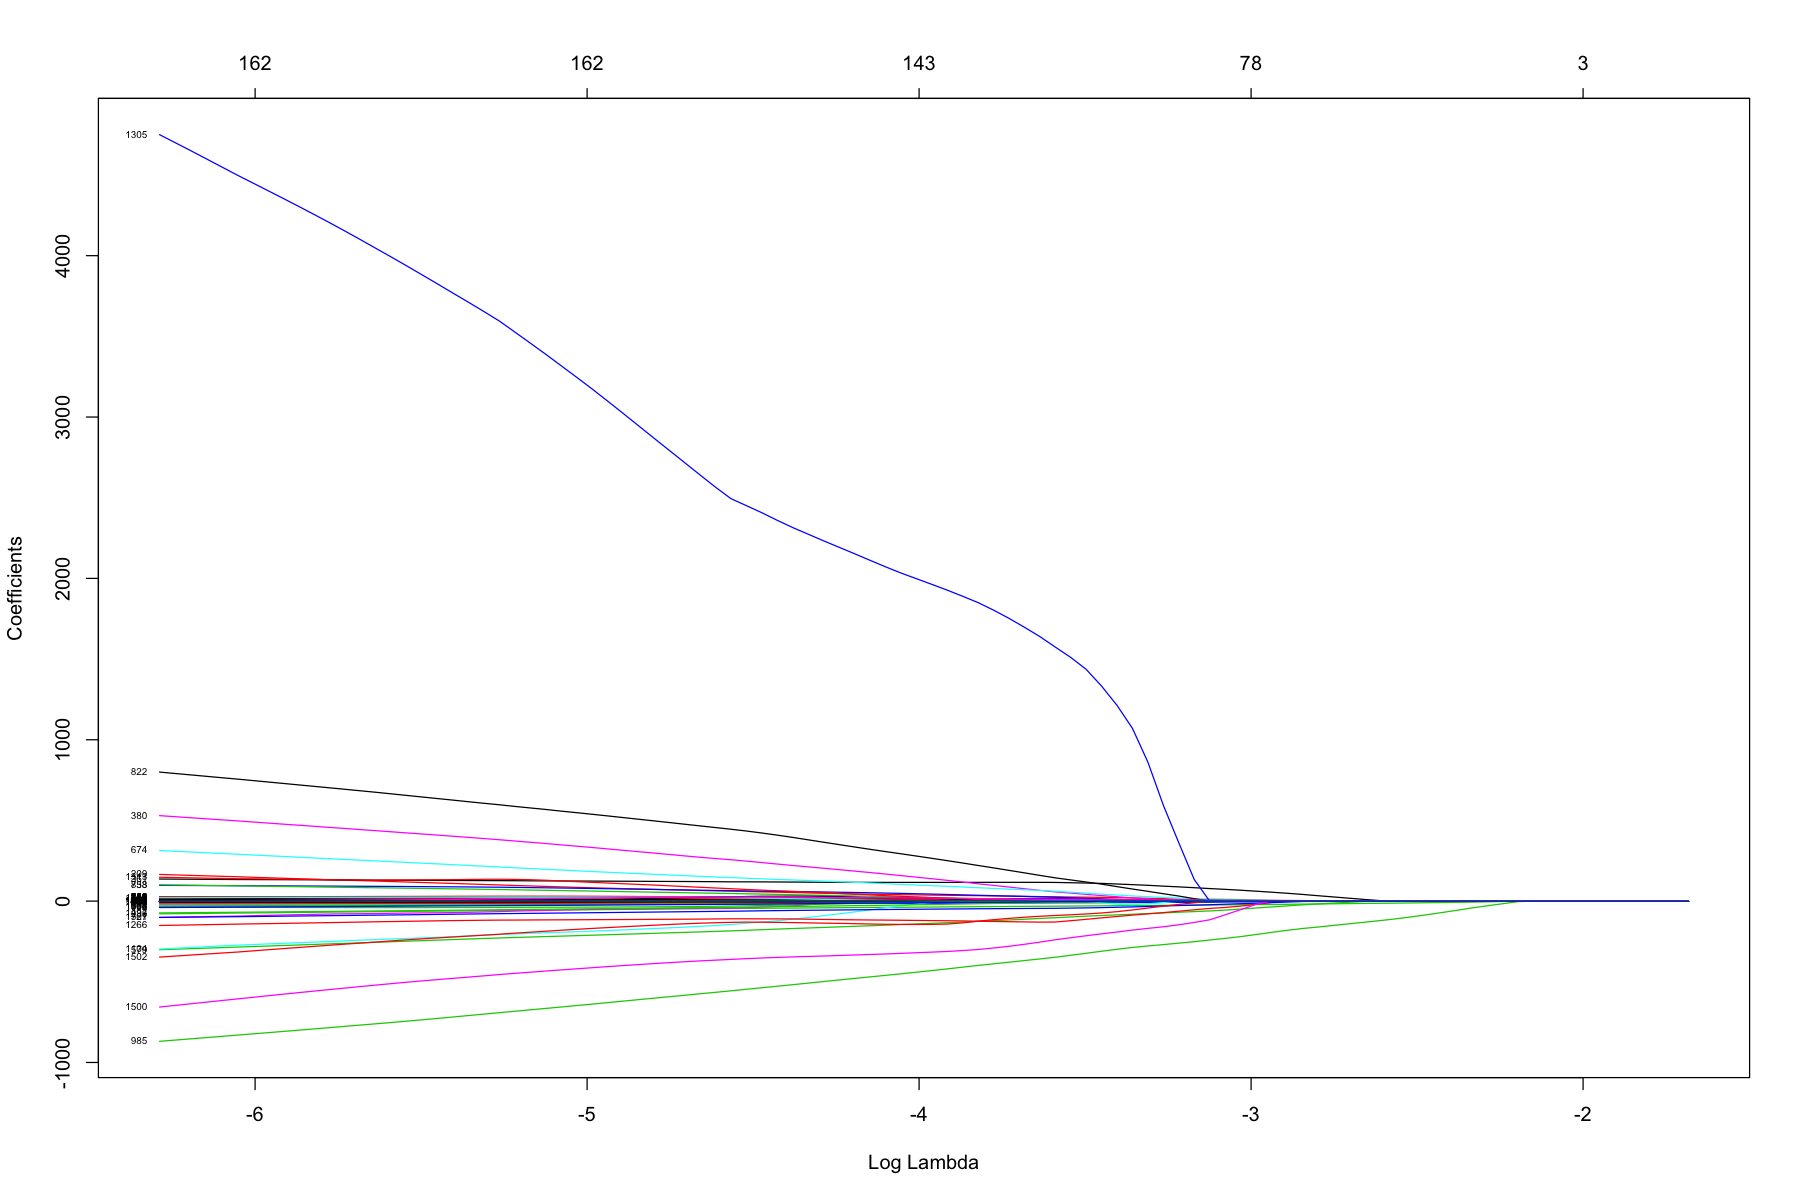

In [9]:
y = factor(dataCancerNoCancer$disease)
x = t(exprs(dataCancerNoCancer))

lassoFit = glmnet(y=y, x=x, family="binomial")

plot(lassoFit, xvar = "lambda", label = TRUE)


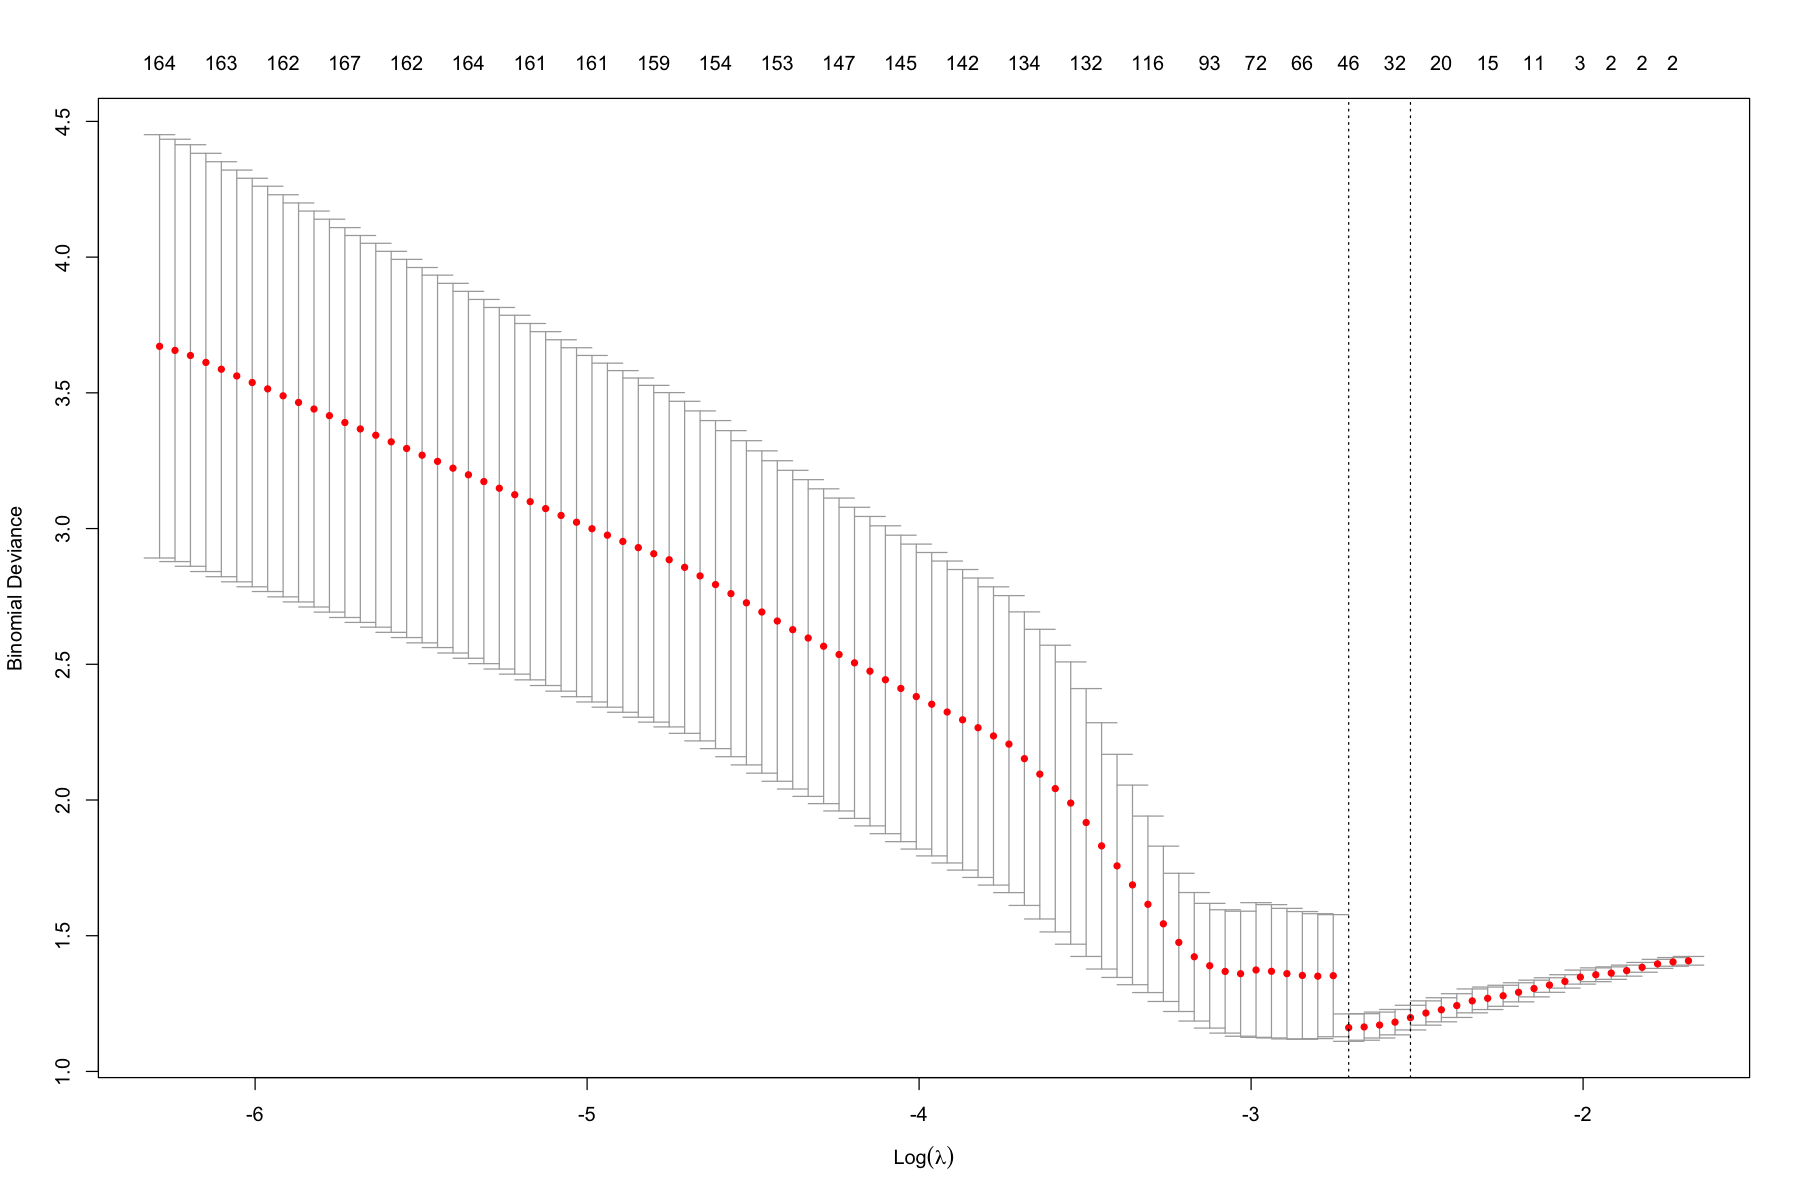

In [10]:
crossValidationOutput <- cv.glmnet(y=factor(dataCancerNoCancer$disease),
                                   x=t(exprs(dataCancerNoCancer)), family="binomial")

plot(crossValidationOutput)

In [11]:
bestLambda = crossValidationOutput$lambda.min
confusionMatrix = predict(lassoFit, newx = t(exprs(dataCancerNoCancer)), type="class",s=bestLambda)
table(confusionMatrix, dataCancerNoCancer$disease)

               
confusionMatrix cancer  n
         cancer     41  3
         n          12 58

ii) Write code to extract the number of false positives (non-cancer patients that are predicted to have cancer) and false negatives (cancer patients that are predicted to not have cancer).

## 3.  Elastic Net regression

The characteristic feature of Ridge regression is the penalty

$$\mbox{log}\left(L(\beta)\right) - \lambda \sum_i  \beta_i ^2,$$

while the penalty for Lasso regression is

$$\mbox{log}\left(L(\beta)\right) - \lambda \sum_i | \beta_i |.$$

In this Problem Set, we explore the penalty

$$\mbox{log}\left(L(\beta)\right) - \lambda \left(\alpha \sum_i | \beta_i | +  (1-\alpha) \sum_i  \beta_i ^2\right),$$

which is called __Elastic Net__.  

i) In parameter space, Ridge Regression corresponds to finding optimal parameters on a circle, while LASSO regression corresponds to finding optimal parameters on a diamond. What shape does Elastic Net correspond to?

ii). The `glmnet` package was built for Elastic Net regression. Look up the [glmnet package help files](https://www.rdocumentation.org/packages/glmnet/versions/3.0-2/topics/glmnet) to find out how to perform Elastic Net regression for a specific $\alpha$. Do this for $\alpha=0.5$, and return the confusion matrix.

iii) Perform a sweep over $\alpha=0$ to $\alpha=1$. Plot the number of species included versus $\alpha$.

Hint: The cv.glmnet output object has a returns a value `$nzero`, which is the number of nonzero factors, which is the number of species desired.  

iv) What $\alpha$ value minimizes the number of false positives (non-cancer patients that are predicted to have cancer)? What $\alpha$ value minimizes the number of false negatives (cancer patients that are predicted to not have cancer)?